<a href="https://colab.research.google.com/github/rajy4683/EIP4_new/blob/master/RajeshY1stDNN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


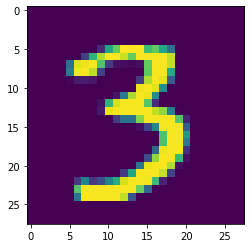

In [51]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[10000])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [54]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [56]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [57]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Convolution2D(128, 3, activation='relu'))
model.add(Convolution2D(256, 3, activation='relu'))

#model.add(Convolution2D(512, 3, activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [58]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 10)         

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
history = [0] *10

In [0]:
# PLOT ACCURACIES
def plot_accuracies(history, bound_lower=0.94, bound_upper=1):
    plt.figure(figsize=(15,5))
    plt.plot(history.history['acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    #plt.legend(names, loc='upper left')
    axes = plt.gca()
    axes.set_ylim([bound_lower,bound_upper])
    plt.show()

In [0]:
def plot_losses(history, bound_lower=0.002, bound_upper=1):
    plt.figure(figsize=(15,5))
    plt.plot(history.history['loss'],linestyle='-.')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    #plt.legend(names, loc='upper left')
    axes = plt.gca()
    axes.set_ylim([bound_lower,bound_upper])
    plt.show()

In [63]:
history[0] = model.fit(X_train, Y_train, batch_size=50, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 27s 446us/step - loss: 0.1730 - acc: 0.9439
Epoch 2/10
60000/60000 [==============================] - 25s 424us/step - loss: 0.0539 - acc: 0.9837
Epoch 3/10
60000/60000 [==============================] - 25s 418us/step - loss: 0.0391 - acc: 0.9879
Epoch 4/10
60000/60000 [==============================] - 25s 414us/step - loss: 0.0308 - acc: 0.9905
Epoch 5/10
60000/60000 [==============================] - 25s 413us/step - loss: 0.0246 - acc: 0.9922
Epoch 6/10
60000/60000 [==============================] - 25s 415us/step - loss: 0.0191 - acc: 0.9937
Epoch 7/10
60000/60000 [==============================] - 25s 412us/step - loss: 0.0159 - acc: 0.9953
Epoch 8/10
60000/60000 [==============================] - 25s 409us/step - loss: 0.0137 - acc: 0.9954
Epoch 9/10
60000/60000 [==============================] - 25s 412us/step - loss: 0.0109 - acc: 0.9963
Epoch 10/10
60000/60000 [==============================] - 24s 407us/step - loss: 

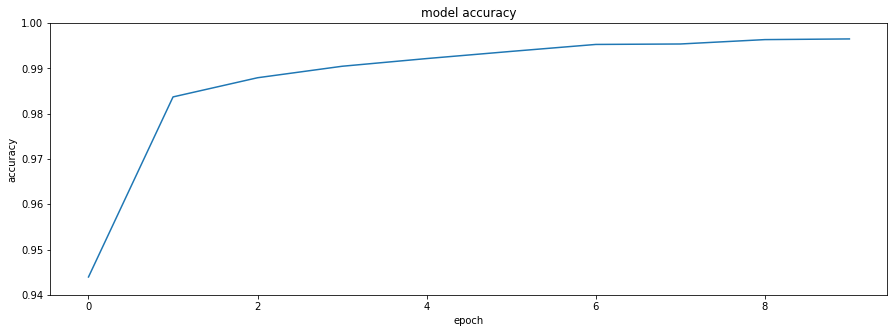

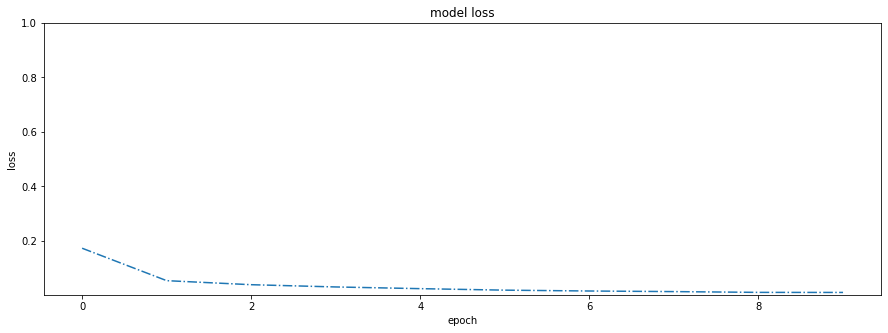

In [64]:
plot_accuracies(history[0])
plot_losses(history[0])

In [65]:
history[1]=model.fit(X_train, Y_train, batch_size=50, nb_epoch=5, verbose=1)

Epoch 1/5
  350/60000 [..............................] - ETA: 25s - loss: 0.0060 - acc: 0.9943

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 25s 410us/step - loss: 0.0096 - acc: 0.9967
Epoch 2/5
60000/60000 [==============================] - 24s 406us/step - loss: 0.0088 - acc: 0.9974
Epoch 3/5
60000/60000 [==============================] - 24s 405us/step - loss: 0.0084 - acc: 0.9972
Epoch 4/5
60000/60000 [==============================] - 24s 408us/step - loss: 0.0066 - acc: 0.9980
Epoch 5/5
60000/60000 [==============================] - 24s 406us/step - loss: 0.0073 - acc: 0.9977


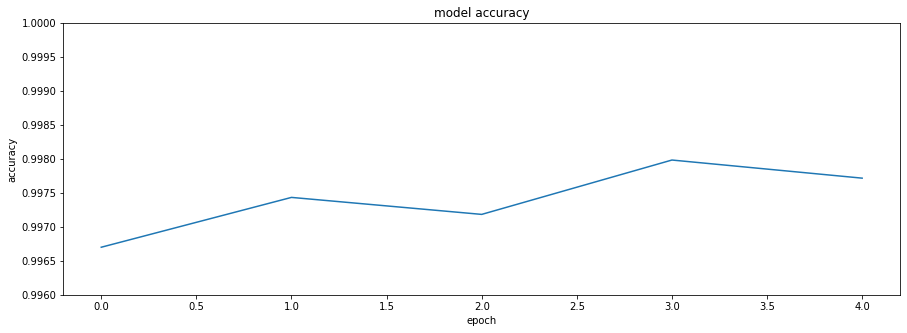

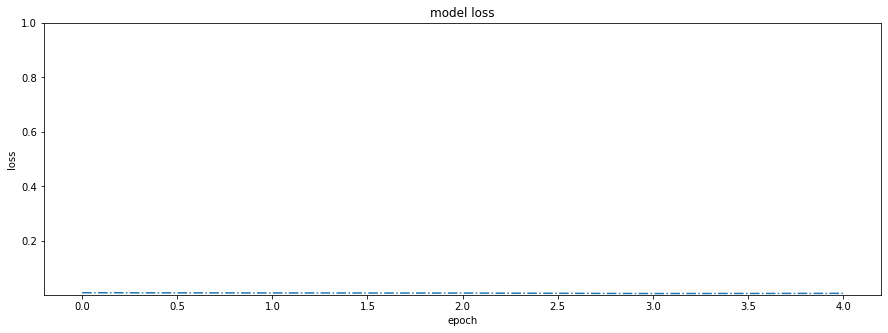

In [66]:
plot_accuracies(history[1],0.996, 1)
plot_losses(history[1])

In [67]:
history[2] = model.fit(X_train, Y_train, batch_size=50, nb_epoch=5, verbose=1)

Epoch 1/5
  350/60000 [..............................] - ETA: 25s - loss: 0.0041 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 24s 406us/step - loss: 0.0056 - acc: 0.9980
Epoch 2/5
60000/60000 [==============================] - 24s 407us/step - loss: 0.0066 - acc: 0.9980
Epoch 3/5
60000/60000 [==============================] - 24s 408us/step - loss: 0.0058 - acc: 0.9982
Epoch 4/5
60000/60000 [==============================] - 24s 408us/step - loss: 0.0048 - acc: 0.9984
Epoch 5/5
60000/60000 [==============================] - 24s 408us/step - loss: 0.0070 - acc: 0.9981


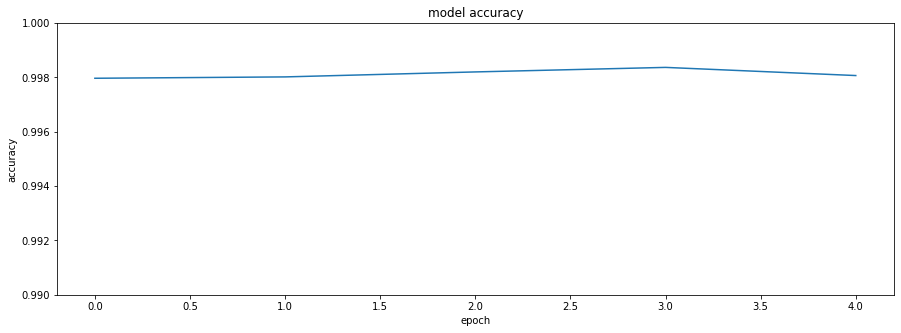

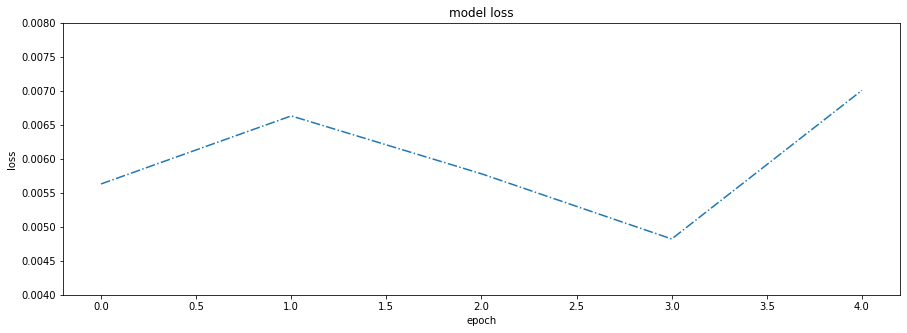

In [68]:
plot_accuracies(history[2],0.99)
plot_losses(history[2],0.004,0.008)

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [70]:
print(score)

[0.0366362296496849, 0.9924]


In [71]:
history[3] = model.fit(X_train, Y_train, batch_size=80, nb_epoch=2, verbose=1)

Epoch 1/2
  560/60000 [..............................] - ETA: 18s - loss: 0.0022 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 17s 276us/step - loss: 0.0016 - acc: 0.9996
Epoch 2/2
60000/60000 [==============================] - 17s 276us/step - loss: 8.1006e-04 - acc: 0.9998


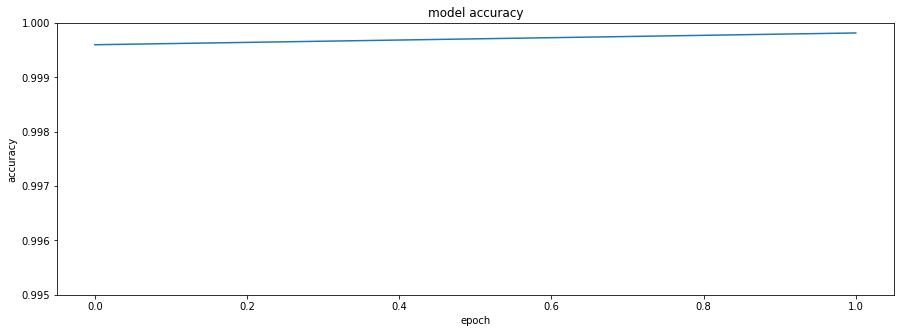

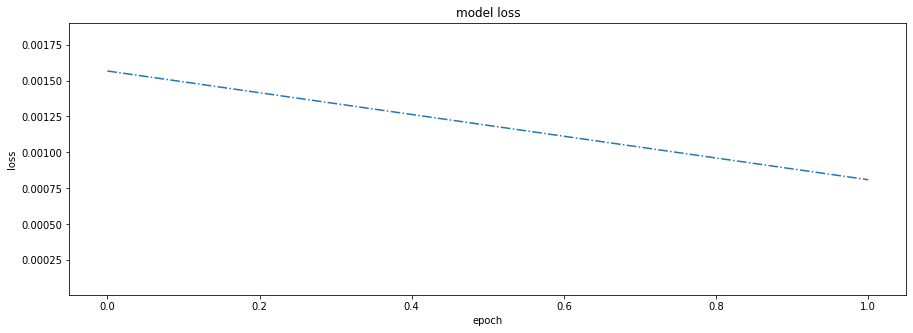

In [72]:
plot_accuracies(history[3],0.995)
plot_losses(history[3],0.00001, 0.0019)

In [73]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.04876753929698764, 0.9904]


In [0]:
model.save('new1_9925.hdf5')

In [0]:
# from keras.models import load_model
# # Custom model loaded for testing--->This model achieved 99.06% accuracy:
# model2 = load_model('new1.hdf5')

In [0]:
#score2 = model2.evaluate(X_test, Y_test, verbose=1)

In [0]:
#print(score2)

In [0]:
y_pred = model.predict(X_test)

In [79]:
print(y_pred[:9])
print(y_test[:9])

[[2.9312002e-24 2.8014842e-19 8.5647504e-16 5.7014622e-15 4.4074258e-24
  3.2667659e-21 1.4425157e-33 1.0000000e+00 7.0309206e-22 7.2571384e-14]
 [4.1104465e-16 1.7951838e-12 1.0000000e+00 4.0377006e-23 1.4918330e-22
  2.0710612e-31 9.6724936e-17 1.1586269e-23 2.2668067e-20 2.4992874e-27]
 [1.0237177e-16 1.0000000e+00 6.0795385e-13 3.6077723e-19 3.3007904e-12
  1.1003584e-12 2.0832760e-12 1.7102332e-13 1.7104655e-16 1.1856780e-15]
 [1.0000000e+00 2.1220982e-26 1.8616563e-17 1.0910215e-26 7.6098126e-29
  2.2171942e-21 2.8580567e-12 2.6752344e-27 2.3990364e-18 3.7758336e-22]
 [3.1441094e-30 2.7175587e-28 3.0841397e-25 4.6023138e-35 1.0000000e+00
  4.1721966e-25 9.1923404e-26 1.3742230e-26 2.7374879e-25 3.4166453e-14]
 [4.3879538e-22 1.0000000e+00 2.2734025e-15 2.7688308e-22 3.1415888e-13
  1.0793769e-18 9.6233081e-20 1.2642746e-12 4.1874183e-20 2.4264727e-18]
 [5.8381449e-35 1.0194221e-18 3.7139589e-17 1.1232386e-27 1.0000000e+00
  1.1941945e-21 9.7917292e-26 9.7884546e-16 9.1361431e-15 

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

type(y_pred[0])

numpy.ndarray

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [95]:
model.layers[0].name

'conv2d_7'

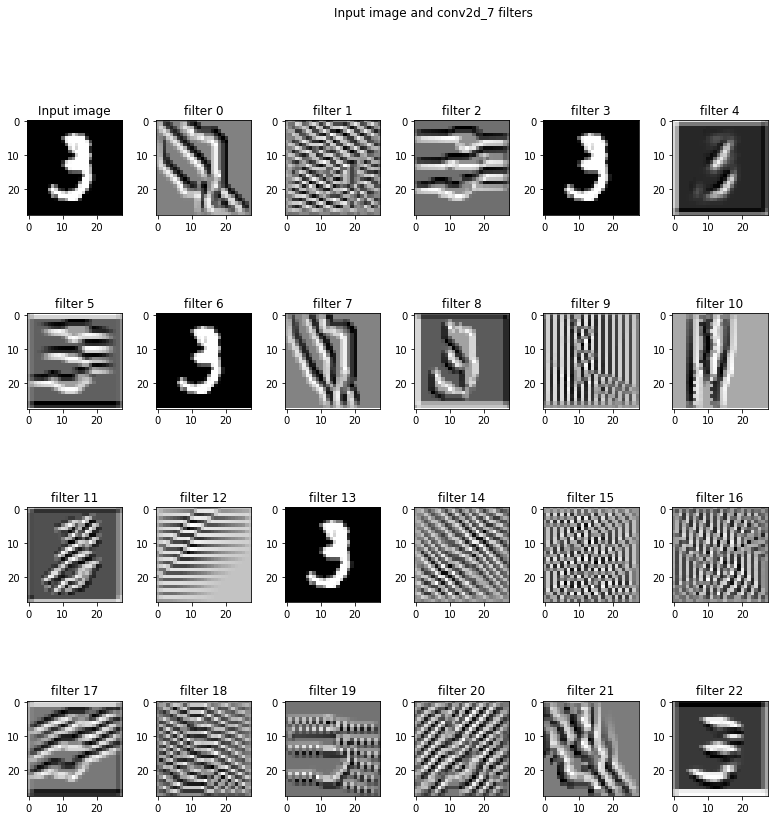

In [96]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_2'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter(img = np.array(X_train[10]).reshape((1, 28, 28, 1)).astype(np.float64), layer_name=model.layers[0].name)

### Below is a test with Kaggle dataset and predictions from https://www.kaggle.com/cdeotte/how-to-choose-cnn-architecture-mnist/data 

Reached around 99.5% accuracy with my model and using labels + test data set from the above link

In [0]:
# X_train.shape

In [0]:
# new_test = pd.read_csv("/content/test_mnist.csv")

In [0]:
# Y_new_test = pd.read_csv("/content/MNIST-CNN.csv")
# X_new_test = pd.read_csv("/content/test_MNIST.csv")

In [0]:
# X_new_test = X_new_test / 255.0

In [0]:
# Y_new_test.drop(labels = ["ImageId"],axis = 1)

In [0]:
# X_new_test.values[0]

In [0]:
# X_new_test = X_new_test.values.reshape(-1,28,28,1)

In [0]:
# Y_new_test = np_utils.to_categorical(Y_new_test['Label'], 10)


In [0]:
# score2 = model.evaluate(X_new_test, Y_new_test, verbose=0)
# print(score2)

In [0]:
# result = model.predict(X_new_test)

In [0]:
# result = np.argmax(result,axis = 1)

In [0]:
# result = pd.Series(result,name="Label")
# submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),result],axis = 1)
# submission.to_csv("/contentMNIST-CNN_own.csv",index=False)